# Tuto Pandas

Pandas est un outils lié à numpy, très utile pour l'analyse de données. Une philosophie à cheval entre `numpy` et le SQL, une bibliothèque rapide.

* Colonnes nommées
* Group by
* Bon outils d'exploration des données
* Très bonne gestion des données de dates
* Bon outils pour récupérer des JSON [notebook suivant]


<span style="color:red"> Beaucoup de recoupement avec numpy... Avec une syntaxe et une pholosophie différente: ça embrouille! </span>

La bonne adresse officielle: [lien](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

##  Plan du TP

* [A. Chargement des données](#a-chargement-et-traitements-basiques-des-données)
    * [A.1. Statistiques de base](#a1-affichage-des-statistiques-de-base)
    * [A.2. Valeurs manquantes](#a2-remplacement-des-valeurs-manquantes)
    * [A.3. Group by](#a3-group-by)
    * [A.4. Discrétisation](#a4-histogramme--discrétisation)
* [B. Affichages & distributions de données](#b-distribution-des-données--affichages)
    * [B.1. dans pandas](#b1-outils-pandas)
    * [B.2. Librairie seaborn](#b2-seaborn)
* [C. Séries temporelles](#c-pandas-et-les-séries-temporelles)
    * [C.1. Gestion des dates](#c1-mise-en-forme-des-dates)
    * [C.2. Indexation](#c2-indexation-des-dates)
    * [C.3. Affichage](#c3-affichage)
    * [C.4. Formats de date](#c4-tests-avec-différents-fichiers--différents-formats)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A. Chargement et traitements basiques des données

1. Chargement des csv
    * **Avec les noms de colonnes**
2. Exploration des données
    * Comme `numpy`
    * Outil intégré: calcul de statistique de base `describe`
3. Gestion des données manquantes
    * comme `numpy`

## A.1 Affichage des statistiques de base

Attention, les colonnes sont filtrées, seules les colonnes numériques sont décrites dans `describe`

**Note importante:** pandas est une surcouche de numpy, il est toujours possible de revenir à des matrices classiques

In [3]:
filename = "data/auto-mpg.csv"
data = pd.read_csv(filename)

# liste des colonnes
print(data.columns)

data.describe() # attention, toutes les colonnes ne sont pas décrites
#data.head(5)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# pandas => numpy

mat = data.values

print(type(mat)) # on est bien sur un objet numpy
print(mat)

## A.2 Remplacement des valeurs manquantes

La colonne `horsepower` contient des données manquantes... 

On va utiliser `fillna` pour remplacer les valeurs, mais il existe aussi une fonction `dropna` pour supprimer les lignes ou les colonnes comportant des valeurs manquantes.

In [ ]:
# 1. Mise en évidence du problème

print("type des données weight:", type(data['horsepower'][0])) # la colonne est bien composée d'entier
print(data['horsepower'][20:40]) # la colonne est bien composée d'entier

In [8]:
# 2. syntaxe pandas pour la résolution

data = pd.read_csv("data/auto-mpg.csv", na_values=["?"]) # chargement des données avec les bonnes options
data.describe() # la colonne est directement au format numérique (on voit ses stats: regarder le nb de données)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# 3. remplacement des valeurs manquantes

data['horsepower'].fillna(value = data['horsepower'].mean())  # vous choisissez ce que vous voulez comme valeur
                                                              # il y a aussi des stratégies de remplacement (!= valeur unique)
data.describe() # la colonne est directement au format numérique (on voit ses stats: regarder le nb de données)

# ATTENTION: il ne s'est rien passé (pas de stockage des valeurs !!!)

In [9]:
# 3 bis. remplacement des valeurs manquantes

data['horsepower'].fillna(value = data['horsepower'].mean(), inplace=True) # avec l'option de remplacemnet
data.describe() # la colonne est directement au format numérique (on voit ses stats: regarder le nb de données)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# 4. test de dropna
# il faut recharger les données puis supprimer les lignes correspondantes

data = pd.read_csv("data/auto-mpg.csv", na_values=["?"]) # chargement des données avec les bonnes options
data.dropna(axis='index', inplace=True) # suppression des lignes concernées

data.describe() # vérifier le nombre de lignes par rapport à l'exemple précédent


2 remarques importantes sur les valeurs manquantes:

1. Il est possible d'utiliser des stratégies super pour les séries temporelles (interpolation, remplacement par la dernière valeur observées): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
2. Il n'est pas possible d'utiliser le test: `data[col] == np.nan` => Le test est toujours faux, même pour `np.nan`

## <span style="color:red">Exo(3) Remplacement des valeurs manquantes </span> 

On ajoute une colonne nommée `absurde` qui contient des valeurs aléatoires et des valeurs manquantes... Remplacer les valeurs manquantes par `-1` et vérifier le résultat.

In [4]:
# ajout de la colonne
import random
p = 0.1 # pc de valeurs manquantes

data['absurde'] = [np.nan if random.random()<p else random.random() for i in range(len(data))]
data.describe() # regarder le nombre de valeurs dans la nouvelle colonne

,mpg,cylinders,displacement,weight,acceleration,model year,origin,absurde
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,349.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.499699
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.292865
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.004012
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.233629
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.509914
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,0.754912
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,0.996530


In [6]:
# remplacer les valeurs manquante + vérification (2 lignes)

# <CORRECTION>
data['absurde'].fillna(value = data['absurde'].mean(), inplace=True) # avec l'option de remplacemnet
data.describe() # la colonne est directement au format numérique (on voit 
# </CORRECTION>

,mpg,cylinders,displacement,weight,acceleration,model year,origin,absurde
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.499699
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.274196
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.004012
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.275480
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.499699
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,0.734049
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,0.996530


## <span style="color:red"> Exo (1): Création d'une nouvelle colonne </span>

Ajouter une colonne binaire nommée `P100` qui ditingue les voitures de plus de 100CV et celles de moins de 100CV.

**Note:** attention à bien travailler sur les données sans valeur manquante sinon vous aurez le message:
```
TypeError: '>=' not supported between instances of 'str' and 'int'
```

In [10]:
# A faire (entre 1 et 2 lignes de code)

# <CORRECTION>
data['P100'] = np.where(data['horsepower']>=100, 1, 0)

data.describe()
# </CORRECTION>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,P100
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,0.434673
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055,0.496338
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


## A.3 Group by

Afin d'illustrer `group by`, on va re-créer une colonne pour la marque des voitures... Puis calculer des choses dessus:

In [22]:
# 1. marque de voiture: ajout d'une colonne

data['marque'] = [s.split()[0] for s in data['car name']]

In [ ]:
# 2. Moyenne des colonnes pour chaque marque

data.groupby(['marque']).mean()

In [ ]:
# Pour du comptage
data.groupby(['marque']).count()

In [ ]:
# groupby sur 2 attributs (le premier puis le second)
data.groupby(['marque','cylinders']).mean()

## <span style="color:red">EXO(2) : group by </span>

Calculer & afficher la consommation moyenne pour chaque nombre de cylindre

In [17]:
# une ligne de code bien trouvée (2 ou 3 max)

# <CORRECTION>
# pour toutes les colonnes:
data.groupby(['cylinders']).mean()

# pour une seule
data.groupby(['cylinders'])['mpg'].mean()
# </CORRECTION>


cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

## A.4 Histogramme & discrétisation

Comme nous l'avons vu dans les TP précédents, la discrétisation est un levier important pour encoder certaines valeurs. `pandas` propose des outils simples pour effectuer cette opération.

Pour la discrétisation, on peut opter selon les besoins soit:
* découpage régulier des données (le plus classique) : `cut`
* découpage selon des quantiles : `qcut`

Les exemples suivants exploitent `cut`, la syntaxe est la même avec `qcut`

In [ ]:
# 1. cut: discrétisation 1 valeur => 1 intervalle (12 = 12 intervalle)

# application de la transformation + affichage des 20 premières valeurs
print(pd.cut(data['displacement'], 12)[:20]) # bonne opération mais sortie peu exploitable

In [ ]:
# 2. intervalle => indice discret (plus facile à exploiter)

print(pd.cut(data['displacement'], 12, labels=False)) # sortie en indice

# ajout d'une colonne correpondant 
data['displ_d'] = pd.cut(data['displacement'], 12, labels=False)

# affichage du résultat
data.describe()

## <span style="color:red"> EXO(1) : Discrétisation des valeurs continues</span>

Faire une discrétisation des consommations `mpg` en 10 catégories dans la colonne `mpg_d`

Afficher l'histogramme correspondant (en théorie, c'est le même que sur les valeurs continues... Car histogramme = discrétisation + affichage)


<AxesSubplot:>

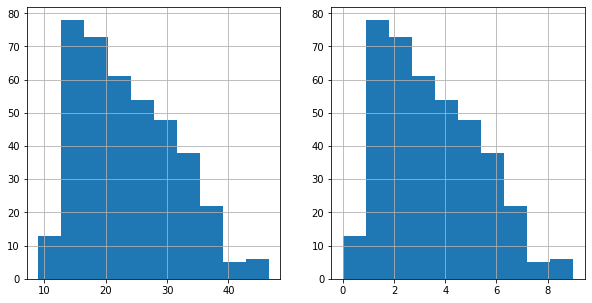

In [20]:
# <CORRECTION>
data['mpg_d'] = pd.cut(data['mpg'], 10, labels=False) # création de la colonne

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
data['mpg'].hist()

plt.subplot(1,2,2)
data['mpg_d'].hist()

# </CORRECTION>

## <span style="color:red"> EXO(3) : Discrétisation des valeurs continues + comptage</span>

On va maintenant changer de discrétisation:

1. Discrétiser les consommations en quantile (remplacer la colonne précédente)
1. Compter l'apparition des marques dans chaque quantile de consommation
1. Trouver la marque la plus présente dans chaque quantile


Pour chaque décile, compter combien de fois chaque marque est citée et afficher la marque le plus représentative du décile.

1. Il faut un double `groupby`
2. Explorer le résultat n'est pas simple, la structure pandas créée à un double index... Il y aura donc un index 0 et un index 1.
```
# selection de tous les éléments dont l'index 0 vaut i:
agg[agg.index.get_level_values(0)==i]
```
3. La réponse globale est (très) compliquée à extraire (avec des `argmax`)... Mais il est possible de faire un print sur le `groupby` pour *voir* la réponse.

Réponse attendue:
```
0 ford
1 chevrolet
2 amc
3 amc
4 ford
5 toyota
6 ford
7 chevrolet
8 datsun
9 datsun
```

In [27]:

### </CORRECTION> ###

data['mpg_d'] = pd.qcut(data['mpg'], 10, labels=False) # création de la colonne

agg = data.groupby(['mpg_d','marque'])['mpg_d'].count()  # le choix de 'mpg' est arbitraire (toutes colonnes =)
print(agg)

for i in np.unique(agg.index.get_level_values(0)):
    #print(i, agg[agg.index.get_level_values(0)==i])
    print(i,agg[agg.index.get_level_values(0)==i].index.get_level_values(1)[agg[agg.index.get_level_values(0)==i].argmax()])
### </CORRECTION> ###

mpg_d  marque    
0      amc           3
       buick         5
       chevrolet     7
       chevy         2
       chrysler      2
                    ..
9      renault       3
       toyota        3
       triumph       1
       volkswagen    2
       vw            4
Name: mpg_d, Length: 157, dtype: int64
0 ford
1 chevrolet
2 amc
3 amc
4 ford
5 ford
6 ford
7 chevrolet
8 datsun
9 datsun


# B. Distribution des données & affichages

* il existe des fonctions d'affichages (matplotlib) directement accessibles depuis pandas
* la librairie `seaborn` axée sur l'analyse des distributions de données permet des affichages avancés sur les données chargées depuis `pandas`

## B.1. Outils pandas

ATTENTION, il s'agit encore une fois d'outils déjà vu... Dont l'interface d'utilisation est changée en passant dans pandas: ça peut être sources de confusion.

Il s'agit cependant d'outils pratiques, rapides à mettre en oeuvre: ça vaut le coup de les voir.

In [ ]:
# utilisation de matplotlib depuis pandas

plt.figure(facecolor='white')
data['displacement'].hist() # histogramme sur une colonne

plt.figure(facecolor='white')
data['displacement'].hist(bins=30) # même histogramme avec plus de catégories


In [ ]:
# histogramme en version continue, avec une fenêtre gaussienne => estimation de densité

plt.figure(facecolor='white')
data['displacement'].plot.density() # en version continue, avec une fenêtre gaussienne 

plt.figure(facecolor='white')
data['displacement'].plot.density(bw_method=0.1) # on peut évidemment jouer sur la largeur de bande


In [ ]:
# des outils annexes

plt.figure(facecolor='white', figsize=[8,4])
plt.subplot(1,2,1)
pd.plotting.boxplot(data['displacement']) # boxplot sur une colonne (ça peut marcher sur plus de colonne)

#plt.figure(facecolor='white')
plt.subplot(1,2,2)
pd.plotting.boxplot(data.loc[:,['mpg','horsepower','displacement']]) # boxplot sur une colonne (ça peut marcher sur plus de colonne)

In [ ]:
# scatter plot sur des couples de variables
pd.plotting.scatter_matrix(data.loc[:,['mpg', 'cylinders', 'displacement', 'horsepower']])
# on a réduit à 4 colonnes, sinon, la combinatoire est difficile à exploiter

# les lignes suivantes sont facultatives, c'est pour rendre l'image plus facile à lire
plt.gcf().set_facecolor('white')
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(10)

# on voit la corrélation entre consommation et puissance & cylindrée


## B.2. Seaborn

La librairie seaborn est très bien pour visualiser des distributions (notamment des distributions jointes issues des scatter plot).

1. scatter amélioré
2. scatter lissé
    * cf https://seaborn.pydata.org/generated/seaborn.jointplot.html pour les options
3. variantes de boxplot

In [ ]:
import seaborn as sns

sns.relplot(data=data, x="mpg", y="horsepower", hue="cylinders")
plt.gcf().set_facecolor('white')

In [ ]:
# même chose avec des regressions linéaires en prime

sns.lmplot(data=data, x="mpg", y="horsepower", hue="cylinders")
plt.gcf().set_facecolor('white')

In [ ]:
# avec les marginales (avec ou sans les cylindres)

plt.figure()
sns.jointplot(data=data, x="mpg", y="horsepower", kind="reg") # avec une regression
plt.gcf().set_facecolor('white')
plt.figure()
sns.jointplot(data=data, x="mpg", y="horsepower", hue="cylinders")
plt.gcf().set_facecolor('white')

In [ ]:
# lissage 2d
plt.figure()
sns.jointplot(data=data, x="mpg", y="horsepower", kind="kde") # avec une regression
plt.gcf().set_facecolor('white')
plt.figure()
sns.jointplot(data=data, x="mpg", y="horsepower", hue="cylinders", kind="kde")
plt.gcf().set_facecolor('white')

In [ ]:
# 3. variantes de boxplot

sns.boxenplot(data=data, x="mpg", y="marque")
plt.gcf().set_facecolor('white')
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(10)


In [ ]:
# comparaison de chevrolet et ford

# réduction des données aux 2 marques qui m'intéresse data => datar
data['all']="" # trick pour faire marcher la fonction suivante du plot en violon
datar = data[(data['marque']=='chevrolet') | (data['marque']=='ford')]


In [ ]:

plt.figure()
sns.violinplot(x=datar['mpg'],y=datar["marque"])
plt.gcf().set_facecolor('white')

plt.figure()
sns.violinplot(data = datar, x='all', y='mpg', hue="marque",split=True)
plt.gcf().set_facecolor('white')

plt.figure()
data['all']="" # trick pour faire marcher la fonction suivante
sns.violinplot(data = datar, x='cylinders', y='mpg', hue="marque",split=True)
plt.gcf().set_facecolor('white')


Les figures précédentes permettent-elles de répondre à la question suivante?

  > Quelles voitures sont les plus économes entre les Ford et les Chevrolet?

# C. Pandas et les séries temporelles

1. Pandas est le meilleur outil de gestion des dates
    * le problème des dates est critique dans de nombreuses applications... Et c'est un problème difficile!!
2. Pandas permet d'indexer et d'interpoler facilement les données manquantes
3. Pandas contient des outils de prétraitements super-utiles pour la mise en forme des séries temporelles

## C.1. Mise en forme des dates

Directement inspiré de : https://pandas.pydata.org/docs/dev/getting_started/intro_tutorials/09_timeseries.html

* Analyse des dates présentes dans un fichier
* Manipulation des dates
    * Ajout des jours, des weeks-ends
    * Décalage
    * Génération de dates régulières (comme np.arange)

In [ ]:
airq = pd.read_csv('data/air_quality_no2_long.csv')
print(airq.head(5))
airq["datetime"] = pd.to_datetime(airq["date.utc"]) # creation d'une vraie colonne de date

# eon peut transformer les dates directement si on connait le nom de la colonne visée
# airq = pd.read_csv('data/air_quality_no2_long.csv', parse_dates=["date.utc"])

In [ ]:
# si les formats ASCII sont malins, pas d'imapct sur des opérations de base...
print(airq["date.utc"].min())
print(airq["datetime"].min())

In [ ]:
# mais plein d'opérations supplémenaires :

# print(airq["date.utc"].max() - airq["date.utc"].min()) # string => erreur
print(airq["datetime"].max() - airq["datetime"].min()) # date

In [ ]:
# A quel jour de la semaine correspond le premier jour du je de donnée?
print(airq["datetime"].min().day_of_week) # mardi :)

# Quelle sera la date 100 jours plus tard?
print(airq["datetime"].min() + pd.Timedelta("100d"))

In [ ]:
# extraire seulement l'heure associée à chaque entrée
print(airq["datetime"].dt.hour)

# on peut faire la même chose pour les jours/mois/année/minutes/...

In [ ]:
# Générer des séries temporelles (=arange)
# Permet d'ajouter une colonne de date sur les données régulièrement échantillonnées

# individuellement
dates = [pd.Timestamp("1970-01-01"),\
      pd.Timestamp("1970-01-02"),\
      pd.Timestamp("1970-01-03")]

dates = pd.date_range(pd.Timestamp("1970-01-01"), pd.Timestamp("1970-02-15"))
print(len(dates)) # il y a bien 31 jours en janvier

dates = pd.Series(pd.period_range("1/1/2011", freq="M", periods=3))
print(dates)

In [ ]:
# agregation par jour de la semaine

airq.groupby([airq["datetime"].dt.weekday, "location"])["value"].mean()

### Exercice

Trouver le jour le plus pollué en soirée à Paris.
1. Extraire les heures après 20h à Paris.  **Attention**, pour les doubles clauses, l'écriture la plus simple est (comme une numpy):
    ```
    airq[ (airq[col1] == val1) & (airq[col2] == val2) ] # simple & + parenthèses obligatoires
    ```
2. Regrouper par jour + calculer la moyenne. **Note** il y est plus simple de créer une colonne spéciale pour les jours (au sens `day_of_year`) puis de faire un `groupby`.
3. Trouver le jour le plus pollué. De nouveau, la réponse est non triviale: on risque de confondre l'`index` et le numéro de l'entrée.

In [ ]:


### <CORRECTION> ###
airq ["jour"] = airq["datetime"].dt.day_of_year
airq_pn = airq[(airq["city"]=="Paris") & (airq["datetime"].dt.hour>=20)].groupby("jour").mean()
# print(airq_pn)
# print(airq_pn["value"].argmax())
print(airq_pn.iloc[airq_pn["value"].argmax()]) # attention à ne pas confondre les lignes et les index
### </CORRECTION> ###

## C.2. Indexation des dates

En `pandas`, comme dans les bases de données, toutes les données sont indexées. Il est intéressant de faire des dates un index pour accéder plus facilement à des sélections de données

In [ ]:
# indexer les données
airq = airq.set_index('datetime')

In [ ]:
# possibilité offertes

idx  = (airq.index.day > 5) & (airq.index.day <10) # on travaille directement sur les dates
print(airq[idx])                                   # et on récupère les informations correspondantes

# les deux lignes sont évidemment fusionnables

In [ ]:
print(airq.loc["2019-05-09"]) # toutes les données du jour :)

print(airq.loc["20190509"]) # ca marche avec différent format de date

In [ ]:
# et avec des intervalles
airq.loc["20190509":"20190511"]

## C.3. Affichage

Faire des courbes avec des séries temporelles dans pandas

In [ ]:
# récupération des données d'origine
airq = pd.read_csv('data/air_quality_no2_long.csv')
airq["datetime"] = pd.to_datetime(airq["date.utc"]) # creation d'une vraie colonne de date

# A ne pas faire (ATTENTION à l'ordre !!)
plt.figure()
airq[airq['location'] == 'FR04014']['value'].plot()
plt.gcf().set_facecolor('white')

# Ce qu'il faut faire: indexer les données sur les dates
plt.figure()
airq = airq.set_index('datetime') # faire des dates un index est impératif :
                # 1. ça met les dates dasn l'ordre
                # 2. c'est plus joli
airq[airq['location'] == 'FR04014']['value'].plot()
plt.gcf().set_facecolor('white')



In [ ]:
# plot sur une une sélection (une fois l'index temporel établi)

airq[airq["city"] == "Paris"].loc["20190509","value"].plot() # A paris, le 9 mai
plt.gcf().set_facecolor('white')


## Plot Types

There are multiple plot types built int:

<pre>
df.plot.hist()     histogram
df.plot.bar()      bar chart
df.plot.barh()     horizontal bar chart
df.plot.line()     line chart
df.plot.area()     area chart
df.plot.scatter()  scatter plot
...
</pre>

NOTE: You can also call specific plots by passing their name as an argument, as with `df.plot(kind='area')`.

In [ ]:

airq[airq["city"] == "Paris"].loc["20190509","value"].plot(style="o") # essayer le style "o-"
plt.gcf().set_facecolor('white')

plt.figure()
airq[airq["city"] == "Paris"].loc["20190509","value"].plot(kind="barh") # A paris, le 9 mai
plt.gcf().set_facecolor('white')

plt.figure()
airq[airq["city"] == "Paris"].loc["20190509","value"].plot(kind="area") # A paris, le 9 mai
plt.gcf().set_facecolor('white')


Les effets etranges de l'indexation temporelle:

Essayons de comparer plusieurs journées de pollution à Paris

In [ ]:
# plot sur une une sélection (une fois l'index temporel établi)

ax = airq[airq["city"] == "Paris"].loc["20190509","value"].plot() # A paris, le 9 mai
airq[airq["city"] == "Paris"].loc["20190511","value"].plot(ax = ax) # A paris, le 11 mai
airq[airq["city"] == "Paris"].loc["20190518","value"].plot(ax = ax) # A paris, le 18 mai

plt.gcf().set_facecolor('white')


### Exercice 

Proposer une solution pour résoudre le problème.

Note: en revenant dans l'univers numpy/matplotlib, la solution est triviale

## C.4. Tests avec différents fichiers / différents formats

Par défaut, pandas est assez robuste... Quand on touche les limites, on peut toujours définir soi-même le format de date des données:

https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e

Différents fichiers de données sont présents dans le `./data`, faisons quelques tests:


In [ ]:
# exemple 1 (données à l'heure)
fname = "data/ads.csv"

data = pd.read_csv(fname)
print(data.head(5))
data["Time"] = pd.to_datetime(data["Time"]) # remplacement de la colonne
print(data["Time"].max() - data["Time"].min()) # date

data = data.set_index('Time')
data.Ads.plot()
plt.gcf().set_facecolor('white')


In [ ]:
# exemple 1 (données à l'heure + données manquantes)
fname = "data/ads.csv"

data = pd.read_csv(fname)
data["Time"] = pd.to_datetime(data["Time"]) # remplacement de la colonne

# suppression du 16/09
data = data.set_index('Time')
# solution 1 : identification des indices puis suppression
#idx = data[(data.index>pd.to_datetime("2017-09-16")) & (data.index<pd.to_datetime("2017-09-17"))].index
#data.drop(idx, inplace=True)

# solution intégrée
data.drop(index = pd.date_range( "2017-09-16","2017-09-17", freq="H"), inplace=True)


data.Ads.plot() # l'affichage reste bon
plt.gcf().set_facecolor('white')


In [ ]:
# exemple 2 (données au jour)
fname = "data/daily-min-temperatures.csv"

data = pd.read_csv(fname)
print(data.head(5))
data["Date"] = pd.to_datetime(data["Date"]) # remplacement de la colonne
print(data["Date"].max() - data["Date"].min()) # date

data = data.set_index('Date')
data.Temp.plot()
plt.gcf().set_facecolor('white')

Etes-vous capable de traiter le cas **difficile** des données de bière?

* séparateur `;` à spécifier dans `read_csv`
* colonne mal nommée => renommée en `Production`
    * `data = data.rename(columns={"Quarterly beer production in Australia: megalitres. March 1956 ? June 1994": "Production"})`
* dates mal formatée (en trimestre)
    * Couper la chaine sur Q => Année, trimestre
    * Construire une chaine à partir de AAAA-MM-DD
        * `MM = 1+ 3*(int(x.split("Q")[1])-1)`
        * DD = 1

In [ ]:
# exemple 3 (données trimestrielles)
fname = "data/quarterly-beer-production-in-aus-March 1956-June 1994.csv"

### <CORRECTION> ###

data = pd.read_csv(fname, sep=';') # le séparateur était trompeur !
data = data.rename(columns={"Quarterly beer production in Australia: megalitres. March 1956 ? June 1994": "Production"})

print(data.head(5))

# data["Quarter"] = pd.to_datetime(data["Quarter"]) # remplacement de la colonne
# => echec... Le format de date est inconnu !

### </CORRECTION> ###



In [ ]:
# extraction de l'année, mois = trimestre*3, jour = 1 dans une fonction qui retourne la bonne chaine

# test de la fonction 
# print(custom_date_parser("1956Q2"))

# Mise à jour de la colonne Quarter

### <CORRECTION> ###
custom_date_parser = lambda x: "{}-{:02d}-{:02d}".format(x.split("Q")[0], 1+ 3*(int(x.split("Q")[1])-1), 1)
# test
print(custom_date_parser("1956Q2"))
data["Quarter"] = pd.to_datetime([custom_date_parser(x) for x in data["Quarter"]])
# data["Quarter"] = pd.to_datetime(data["Quarter"].map(custom_date_parser))

data.head(5)
### </CORRECTION> ###


In [ ]:
# retour à la normale
print(data["Quarter"].max() - data["Quarter"].min()) # date

data = data.set_index('Quarter')
data.Production.plot()
plt.gcf().set_facecolor('white')

## C.5. Interpolation des données manquantes

1. Les données sont générées (ce qui permet de réviser quelques fonctions)
2. Les points manquants sont interpolés

In [ ]:
import random 

data = {'datetime' : pd.date_range(start='1/15/2018',
                                  end='02/14/2018', 
                                  freq='D')\
                     .append(pd.date_range(start='1/15/2018',
                                           end='02/14/2018',
                                           freq='D')),
        'house' : ['house1' for i in range(31)] 
                  + ['house2' for i in range(31)],
        'readvalue' : [0.5 + 0.5*np.sin(2*np.pi/30*i) 
                       for i in range(31)]\
                     + [0.5 + 0.5*np.cos(2*np.pi/30*i) 
                       for i in range(31)]}
df0 = pd.DataFrame(data, columns = ['datetime', 
                                    'house', 
                                    'readvalue'])
# Randomly drop half the reads
random.seed(42)
df0 = df0.drop(random.sample(range(df0.shape[0]),
                             k=int(df0.shape[0]/2)))

# plot
df0.set_index('datetime', inplace=True)
ax = df0[df0['house']=='house1'].plot(style='o')
df0[df0['house']=='house2'].plot(ax = ax, style='o')
plt.gcf().set_facecolor('white')


In [ ]:
# sur-echantillonage par copie

# print(df0.head(5))
df_pad = df0.groupby('house').resample('D').ffill() # sur-echantillonnage au niveau des jours (='D')
            
ax = df_pad[df_pad['house']=='house1'].plot(style='o-')
df_pad[df_pad['house']=='house2'].plot(ax = ax, style='o-')
plt.gcf().set_facecolor('white')

In [ ]:
# sur-echantillonage par moyenne

df_pad2 = df0.groupby('house').resample('D').mean() # sur-echantillonnage au niveau des jours (='D')
df_pad2['readvalue'] = df_pad2['readvalue'].interpolate() # 

print(df_pad2.head(5))

# accès aux index multiples issus des groupby => syntaxe un peu spéciale
ax = df_pad2[df_pad2.index.get_level_values(0)=='house1'].plot(style='o-')
df_pad2[df_pad2.index.get_level_values(0)=='house2'].plot(style='o-', ax = ax)
plt.gcf().set_facecolor('white')

## C.6. Exercices


### C.6.1 Comparer les niveaux moyens de pollution par lieu, la semaine par rapport aux weeks-ends

### C.6.2 Comparer les performances de reconstruction sur les différents jeux de données pour les différentes stratégies d'interpolation

# Construction du sujet à partir de la correction

In [ ]:
import re
# transformation de cet énoncé en version étudiante

fname = "notebook-pandas-corr.ipynb" # ce fichier
fout  = fname.replace("-corr","")

# print("Fichier de sortie: ", fout )

f = open(fname, "r") 
txt = f.read()
 
f.close()


f2 = open(fout, "w")
f2.write(re.sub("<CORRECTION>.*?(</CORRECTION>)"," TODO ",\
    txt, flags=re.DOTALL))
f2.close()

